In [1]:
import fiona

In [2]:
shpfile = '../data/ZillowNeighborhoods-CA/ZillowNeighborhoods-CA.shp'

In [3]:
shpobj = fiona.open(shpfile)

In [4]:
shpobj.meta

{'crs': {'init': 'epsg:4269'},
 'crs_wkt': 'GEOGCS["GCS_North_American_1983",DATUM["North_American_Datum_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295],AUTHORITY["EPSG","4269"]]',
 'driver': 'ESRI Shapefile',
 'schema': {'geometry': 'Polygon',
  'properties': OrderedDict([('State', 'str:80'),
               ('County', 'str:80'),
               ('City', 'str:80'),
               ('Name', 'str:80'),
               ('RegionID', 'str:80')])}}

In [5]:
next(iter(shpobj))

{'geometry': {'coordinates': [[(-117.1935499999999, 33.74306900000005),
    (-117.1935729999999, 33.74198700000005),
    (-117.19369999999992, 33.73596500000008),
    (-117.18936799999994, 33.73584000000005),
    (-117.18935499999992, 33.72862400000008),
    (-117.18935399999992, 33.72801800000008),
    (-117.18925499999995, 33.72163400000005),
    (-117.18921699999993, 33.719152000000065),
    (-117.18921699999993, 33.71860200000009),
    (-117.18910699999992, 33.717250000000035),
    (-117.18907999999993, 33.715738000000044),
    (-117.18896999999993, 33.71498200000008),
    (-117.18896999999993, 33.71418100000005),
    (-117.18866899999995, 33.712829000000056),
    (-117.18855899999994, 33.71266900000006),
    (-117.18844899999993, 33.711959000000036),
    (-117.18817499999994, 33.71113400000007),
    (-117.1879449999999, 33.71056900000008),
    (-117.18770899999993, 33.709989000000064),
    (-117.18757899999991, 33.709771000000046),
    (-117.1873359999999, 33.70936400000005),
    

In [6]:
rec = next(iter(shpobj))
geom = rec['geometry']

In [7]:
from shapely.geometry import shape

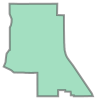

In [8]:
poly = shape(geom)
poly

In [9]:
poly.bounds

(-117.22712599999994,
 33.68503400000009,
 -117.17126599999995,
 33.74306900000005)

In [10]:
list(poly.centroid.coords)

[(-117.20280289452863, 33.71413328700936)]

In [11]:
list(poly.exterior.coords)[0:3]

[(-117.1935499999999, 33.74306900000005),
 (-117.1935729999999, 33.74198700000005),
 (-117.19369999999992, 33.73596500000008)]

In [12]:
geoms = []
props = []
with fiona.open(shpfile) as src:
    for rec in src.filter(bbox=(-123, 37, -122, 38)):
        geoms.append(rec['geometry'])
        props.append(rec['properties'])
    meta = src.meta

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(props)
df['geometry'] = [shape(g) for g in geoms]

In [15]:
df.head()

State         County           City           Name RegionID  \
0    CA    Santa Clara       San Jose         Alviso     8075   
1    CA          Marin     San Rafael  Santa Venetia    20357   
2    CA  San Francisco  San Francisco       Presidio    35760   
3    CA        Alameda        Alameda       East End    38307   
4    CA      San Mateo        Belmont       McDougal    39702   

                                            geometry  
0  POLYGON ((-121.9423569999999 37.46496300000007...  
1  POLYGON ((-122.50308997 38.01594776500008, -12...  
2  POLYGON ((-122.4743132059998 37.81001054900017...  
3  POLYGON ((-122.2409623089999 37.76340228700008...  
4  POLYGON ((-122.294305648 37.51211001400003, -1...

In [16]:
with fiona.open('junk/filtered.shp', 'w', **meta) as dest:
    for i, g in enumerate(geoms):
        dest.write({'properties': props[i],
                    'geometry': g})

In [17]:
from GISio import df2shp, shp2df

In [18]:
df = shp2df(shpfile)


reading ../data/ZillowNeighborhoods-CA/ZillowNeighborhoods-CA.shp...
--> building dataframe... (may take a while for large shapefiles)


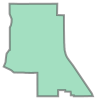

In [20]:
df.geometry[0]

In [21]:
df2shp(df, 'junk/filtered2.shp', prj='junk/filtered.prj')

writing junk/filtered2.shp...
copying junk/filtered.prj --> junk/filtered2.prj...
